/Users/wenda/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Afghanistan: Cluster 0
Albania: Cluster 2
Algeria: Cluster 3
Andorra: Cluster 2
Angola: Cluster 3
Argentina: Cluster 4
Armenia: Cluster 2
Australia: Cluster 1
Austria: Cluster 2
Azerbaijan: Cluster 0
Bahamas: Cluster 4
Bahrain: Cluster 0
Bangladesh: Cluster 1
Barbados: Cluster 4
Belarus: Cluster 2
Belgium: Cluster 2
Belize: Cluster 4
Benin: Cluster 3
Bhutan: Cluster 1
Bolivia: Cluster 4
Bosnia: Cluster 2
Botswana: Cluster 3
Brazil: Cluster 4
Brunei: Cluster 1
Bulgaria: Cluster 2
Burkina_Faso: Cluster 3
Burundi: Cluster 3
Cambodia: Cluster 1
Cameroon: Cluster 3
Canada: Cluster 2
Cape_Verde: Cluster 3
Chad: Cluster 3
Chile: Cluster 4
China: Cluster 1
Colombia: Cluster 4
Comoros: Cluster 3
Congo: Cluster 3
Costa_Rica: Cluster 4
Croatia: Cluster 2
Cuba: Cluster 4
Cyprus: Cluster 2
Czech_Republic: Cluster 2
Denmark: Cluster 2
Djibouti: Cluster 3
Dominica: Cluster 4
Dominican_Republic: Cluster 4
East_Timor: Cluster 1
Ecuador: Cluster 4
Egypt: Cluster 0
El_Salvador: Cluster 4
Equatorial_Guine

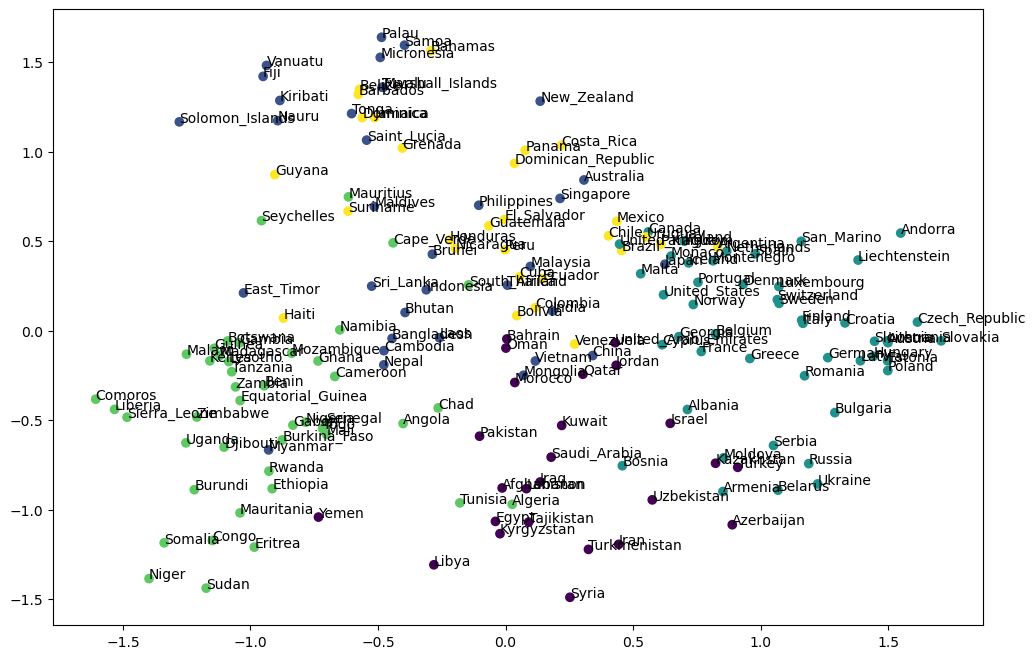

In [2]:
import gensim
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# モデルを読み込む
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

# 国名のリストを作成
countries = ["Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Argentina", "Armenia", "Australia", "Austria",
             "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin", 
             "Bhutan", "Bolivia", "Bosnia", "Botswana", "Brazil", "Brunei", "Bulgaria", "Burkina_Faso", "Burundi", 
             "Cambodia", "Cameroon", "Canada", "Cape_Verde", "Central_African_Republic", "Chad", "Chile", "China", 
             "Colombia", "Comoros", "Congo", "Costa_Rica", "Croatia", "Cuba", "Cyprus", "Czech_Republic", "Denmark", 
             "Djibouti", "Dominica", "Dominican_Republic", "East_Timor", "Ecuador", "Egypt", "El_Salvador", "Equatorial_Guinea", 
             "Eritrea", "Estonia", "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", 
             "Germany", "Ghana", "Greece", "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Honduras", 
             "Hungary", "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy", "Jamaica", "Japan", 
             "Jordan", "Kazakhstan", "Kenya", "Kiribati", "Korea_North", "Korea_South", "Kuwait", "Kyrgyzstan", "Laos", 
             "Latvia", "Lebanon", "Lesotho", "Liberia", "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar", 
             "Malawi", "Malaysia", "Maldives", "Mali", "Malta", "Marshall_Islands", "Mauritania", "Mauritius", "Mexico", 
             "Micronesia", "Moldova", "Monaco", "Mongolia", "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", 
             "Nauru", "Nepal", "Netherlands", "New_Zealand", "Nicaragua", "Niger", "Nigeria", "North_Macedonia", "Norway", 
             "Oman", "Pakistan", "Palau", "Panama", "Papua_New_Guinea", "Paraguay", "Peru", "Philippines", "Poland", 
             "Portugal", "Qatar", "Romania", "Russia", "Rwanda", "Saint_Kitts_and_Nevis", "Saint_Lucia", "Saint_Vincent_and_the_Grenadines", 
             "Samoa", "San_Marino", "Sao_Tome_and_Principe", "Saudi_Arabia", "Senegal", "Serbia", "Seychelles", "Sierra_Leone", 
             "Singapore", "Slovakia", "Slovenia", "Solomon_Islands", "Somalia", "South_Africa", "South_Sudan", "Spain", 
             "Sri_Lanka", "Sudan", "Suriname", "Sweden", "Switzerland", "Syria", "Tajikistan", "Tanzania", "Thailand", 
             "Togo", "Tonga", "Trinidad_and_Tobago", "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", 
             "United_Arab_Emirates", "United_Kingdom", "United_States", "Uruguay", "Uzbekistan", "Vanuatu", "Vatican_City", 
             "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"]

# モデルに存在する国名だけを選択
valid_countries = [country for country in countries if country in model]
country_vectors = [model[country] for country in valid_countries]

# k-meansクラスタリングを実行
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(country_vectors)
labels = kmeans.labels_

# クラスタリング結果を表示
for i, country in enumerate(valid_countries):
    print(f'{country}: Cluster {labels[i]}')

# クラスタリング結果を2Dプロット
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(country_vectors)

plt.figure(figsize=(12, 8))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=labels, cmap='viridis')
for i, country in enumerate(valid_countries):
    plt.annotate(country, (reduced_vectors[i, 0], reduced_vectors[i, 1]))
plt.show()
